In [25]:
import pandas as pd
import os

In [26]:
PATH = "data"

#### data_2d.csv

In [27]:
df = pd.read_csv(os.path.join(PATH, 'data_2d.csv'), header=None)
df

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [28]:
# Select the features for clustering (X)
X = df[[1,2]]
X

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


In [29]:
# Standardize the features (optional but recommended for k-means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.cluster import KMeans

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Try different values of k (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

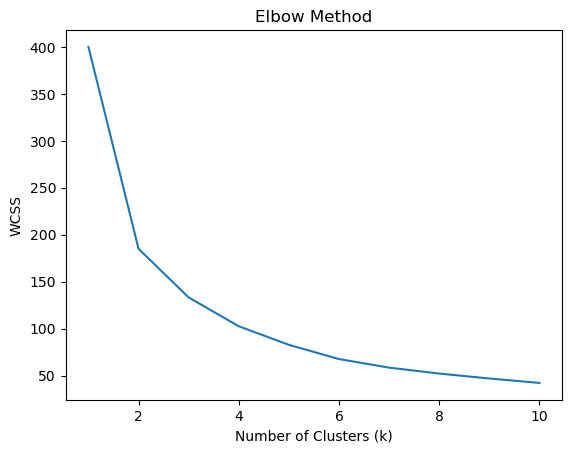

In [31]:
from matplotlib import pyplot as plt

# Plot the elbow curve 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [32]:
from kneed import KneeLocator

# Determine the optimal k using the KneeLocator
knee_locator = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
optimal_k

3

In [33]:
from sklearn.cluster import KMeans

optimal_k =  3
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)
cluster_labels

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2], dtype=int32)

In [34]:
kmeans_optimal.cluster_centers_

array([[-0.02541038,  0.3787169 ],
       [-0.80837593, -1.05907021],
       [ 1.27122632,  0.98736437]])

In [35]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

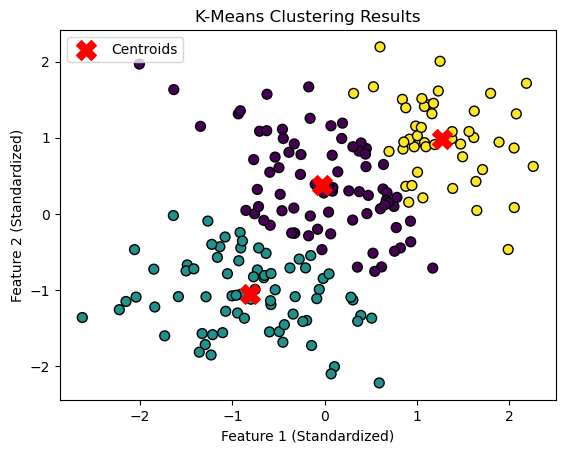

In [36]:
# Scatter plot the data points with different colors for each cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

#### mnist.csv

In [37]:
from sklearn.decomposition import PCA

df_mnist = pd.read_csv(os.path.join(PATH, 'mnist.csv'), header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_mnist)
scaled_data

array([[ 0.91324432,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.82825896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.17655962,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13165765,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52486028,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56494367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
# Apply PCA to reduce dimensionality to 2D
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[-4.52851895e+00,  4.19762654e+00],
       [ 5.02582123e+00, -1.24653183e+01],
       [-6.90741222e+00, -5.89082341e+00],
       [ 8.58416246e+00, -3.37610206e-01],
       [ 1.10588274e+00,  6.57713895e+00],
       [-7.56330294e+00, -5.60847218e+00],
       [-1.28202902e+00,  4.34624219e+00],
       [-3.56492856e+00,  5.07746841e+00],
       [ 3.74355832e+00,  8.16473641e-01],
       [-4.58865627e-01,  4.40524132e+00],
       [ 1.39235220e+01, -4.86835784e+00],
       [ 7.48383479e+00, -2.23252401e+00],
       [-4.69929583e+00,  6.85877319e+00],
       [ 9.11094660e+00,  1.90334110e+00],
       [-8.13253849e+00, -6.98216894e+00],
       [ 4.87242941e+00, -4.44877103e+00],
       [-8.15950705e-01,  9.12712282e+00],
       [-2.14243682e+00,  6.34681655e+00],
       [ 8.88203334e+00, -1.68790197e-01],
       [-3.39910717e+00,  5.31648350e+00],
       [-4.87598265e+00,  1.55829941e+00],
       [ 3.68422938e-01, -1.20013679e+00],
       [ 1.60982895e+00,  9.69611310e-01],
       [-2.

In [40]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pc_df

,PC1,PC2
0,-4.528519,4.197627
1,5.025821,-12.465318
2,-6.907412,-5.890823
3,8.584162,-0.337610
4,1.105883,6.577139
...,...,...
495,8.575665,-1.873354
496,-3.367059,7.348701
497,-6.207997,0.235543
498,0.380049,-0.372406


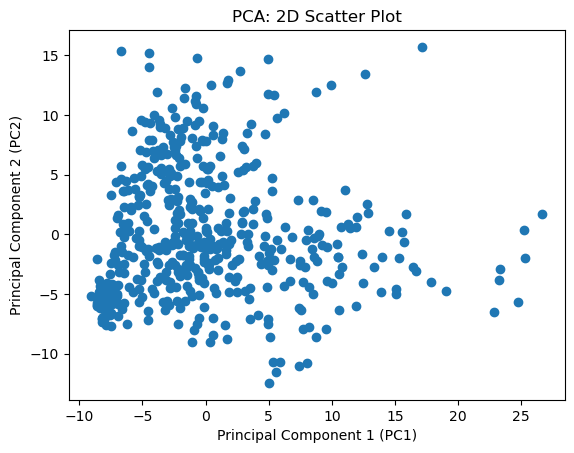

In [41]:
# Scatter plot of the first two principal components
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.title('PCA: 2D Scatter Plot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [42]:
# Elbow Method to find optimal number of clusters (k) for K-Means
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

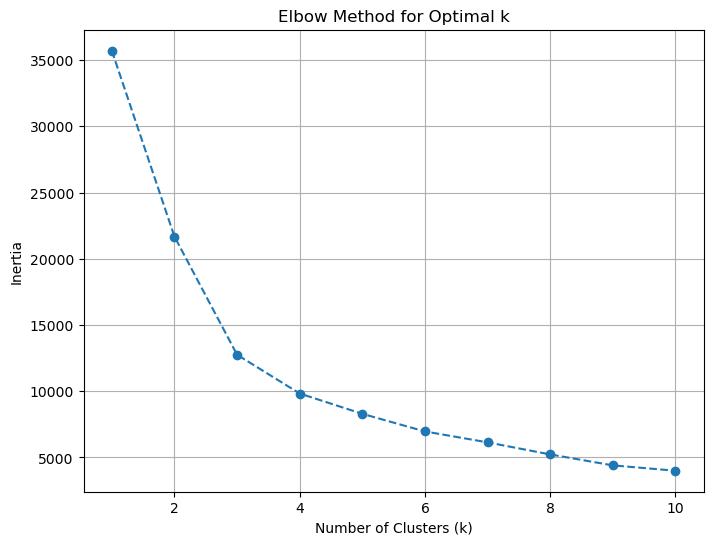

In [47]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [44]:
from kneed import KneeLocator

# Determine the optimal k using the KneeLocator
knee_locator = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
optimal_k

3

In [45]:
# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init='auto', random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result)

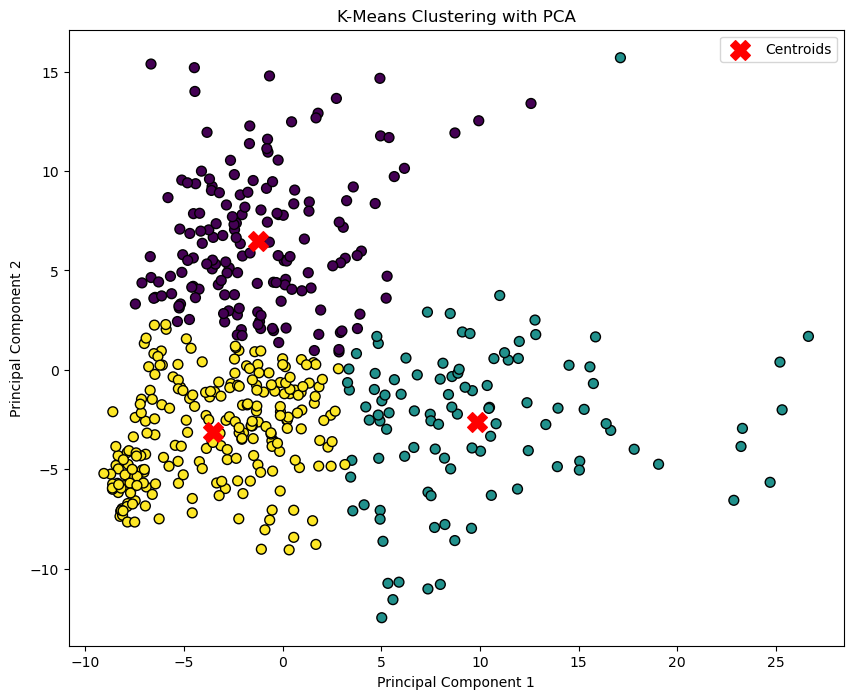

In [46]:
# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()